In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder , StandardScaler
from decimal import Decimal
from re import sub
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn import metrics
import keras
from keras.models import Sequential
from keras.layers import Dense


In [37]:
#Importing the data set 
datasetTrain = pd.read_csv('/home/achraf/Bureau/faurecia/train_auto.csv')

In [38]:
datasetTrain['TARGET_FLAG'].value_counts()

0    6008
1    2153
Name: TARGET_FLAG, dtype: int64

In [39]:
datasetTrain['KIDSDRIV'].value_counts()

0    7180
1     636
2     279
3      62
4       4
Name: KIDSDRIV, dtype: int64

In [40]:
datasetTrain['JOB'].value_counts()

z_Blue Collar    1825
Clerical         1271
Professional     1117
Manager           988
Lawyer            835
Student           712
Home Maker        641
Doctor            246
Name: JOB, dtype: int64

In [41]:
datasetTrain['URBANICITY'].value_counts()

Highly Urban/ Urban      6492
z_Highly Rural/ Rural    1669
Name: URBANICITY, dtype: int64

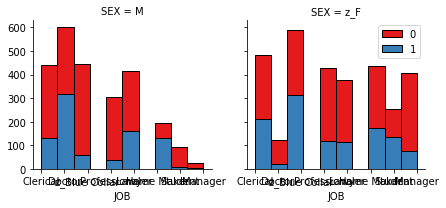

In [42]:
import seaborn as sns

g = sns.FacetGrid(datasetTrain, col="SEX", hue="TARGET_FLAG", palette="Set1", col_wrap=5)
g.map(plt.hist, 'JOB', ec="k")

g.axes[-1].legend()
plt.show()

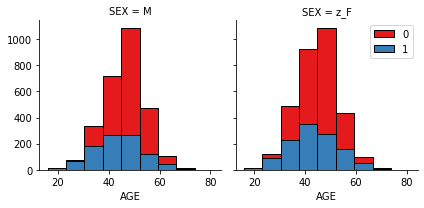

In [43]:
import seaborn as sns

bins = np.linspace(datasetTrain.AGE.min(), datasetTrain.AGE.max(), 10)
g = sns.FacetGrid(datasetTrain, col="SEX", hue="TARGET_FLAG", palette="Set1", col_wrap=2)
g.map(plt.hist, 'AGE', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [44]:
filtredDataset = datasetTrain[(datasetTrain.CAR_AGE >= 0)].dropna()
del filtredDataset['RED_CAR']
del filtredDataset['JOB']
del filtredDataset['EDUCATION']

filtredDataset['INCOME'] = filtredDataset['INCOME'].transform(lambda x : Decimal(sub(r'[^\d.]', '' , x)))
filtredDataset['HOME_VAL'] = filtredDataset['HOME_VAL'].transform(lambda x : Decimal(sub(r'[^\d.]', '' , x)))
filtredDataset['BLUEBOOK'] = filtredDataset['BLUEBOOK'].transform(lambda x : Decimal(sub(r'[^\d.]', '' , x)))
filtredDataset['OLDCLAIM'] = filtredDataset['OLDCLAIM'].transform(lambda x : Decimal(sub(r'[^\d.]', '' , x)))

x = filtredDataset.iloc[: , 3:24].values
y = filtredDataset.iloc[: , 1].values


carType = LabelEncoder()
x[: , 13] = carType.fit_transform(x[: , 13])

parent1 = LabelEncoder()
x[: , 5] = parent1.fit_transform(x[: , 5])

mstatus = LabelEncoder()
x[: , 7] = mstatus.fit_transform(x[: , 7])

sex = LabelEncoder()
x[: , 8] = sex.fit_transform(x[: , 8])

carUse = LabelEncoder()
x[: , 10] = carUse.fit_transform(x[: , 10])

revoked = LabelEncoder()
x[: , 16] = revoked.fit_transform(x[: , 16])

urbanicity = LabelEncoder()
x[: , 19] = urbanicity.fit_transform(x[: , 19])

oneHotEncoder = OneHotEncoder(categorical_features=[13])

x = oneHotEncoder.fit_transform(x).toarray()
x = np.delete(x , 0 , 1)

/home/achraf/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/achraf/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [45]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


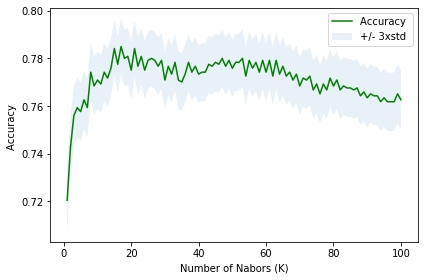

In [46]:
mean_acc=np.zeros(100)
std_acc = np.zeros(100)
for n in range(1,101):
    knnmodel=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    y_pred=knnmodel.predict(X_test)
    mean_acc[n-1]=metrics.accuracy_score(y_test,y_pred)
    std_acc[n-1]=np.std(y_pred==y_test)/np.sqrt(y_pred.shape[0])
    
plt.plot(range(1,101),mean_acc,'g')
plt.fill_between(range(1,101),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [47]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.7849462365591398 with k= 17


In [48]:
dtmodel = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
dtmodel.fit(X_train,y_train)

y_pred=dtmodel.predict(X_test)
TreeAccuracy=metrics.accuracy_score(y_test,y_pred)
TreeAccuracy

0.7526881720430108

In [49]:
svmmodel=svm.SVC(kernel='rbf')
svmmodel.fit(X_train,y_train)

y_pred=svmmodel.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.794044665012407

In [51]:
# Initialising the ANN
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 13, kernel_initializer = 'uniform', activation = 'relu', input_dim = 24))
# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)





Epoch 1/100





4835/4835 [==============================] - 3s 710us/step - loss: 0.5348 - acc: 0.7373
Epoch 2/100
4835/4835 [==============================] - 1s 247us/step - loss: 0.4592 - acc: 0.7822
Epoch 3/100
4835/4835 [==============================] - 1s 261us/step - loss: 0.4481 - acc: 0.7911
Epoch 4/100
4835/4835 [==============================] - 1s 237us/step - loss: 0.4440 - acc: 0.7921
Epoch 5/100
4835/4835 [==============================] - 1s 238us/step - loss: 0.4411 - acc: 0.7928
Epoch 6/100
4835/4835 [==============================] - 1s 240us/step - loss: 0.4390 - acc: 0.7940
Epoch 7/100
4835/4835 [==============================] - 1s 254us/step - loss: 0.4370 - acc: 0.7944
Epoch 8/100
4835/4835 [==============================] - 1s 137us/step - loss: 0.4360 - acc: 0.7932
Epoch 9/100
4835/4835 [==============================] - 1s 133us/step - loss: 0.4350 - acc: 0.7942
Epoch 10/100
4835/4835 [==============================] - 1s 131us/step - loss: 0.4335 - acc

In [53]:
y_pred = classifier.predict(X_test)
for i in range(len(y_pred)):
    if y_pred[i, 0] > 0.5:
        y_pred[i, 0] = 1
    else: 
        y_pred[i, 0] = 0
metrics.accuracy_score(y_test,y_pred)

0.7700578990901572